In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crisis1 = pd.read_csv("../data/NSSCrisisv.1 (1).csv")
header_row = crisis1.iloc[1]
crisis1 = pd.DataFrame(crisis1.values[2:], columns=header_row)
crisis2 = pd.read_csv("../data/NSSCrisisv.2.csv")
header_row = crisis2.iloc[1]
crisis2 = pd.DataFrame(crisis2.values[2:], columns=header_row)

C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,26,27,28,29,31,35,36,37,38,39,40,41,42,43,44,45,48,51,54,55,56,57,58,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,88,89,92,93,94,95,96,97,102,103,104,105,106,107,108,113,117,120,121,122,124,128,136,140,141,142,143,144,145,146,148,152,153,154,155,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,259,261,262,263,264,265,266,267,268,269,270,271,272,273,281,282,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(co

In [3]:
labels = list()
for col in crisis2.columns:
    labels.append(col.replace('Subjective', 'Issues'))
crisis2.columns = labels

In [4]:
crisis1.dropna(how='all', axis=1, inplace=True)
crisis2.dropna(how='all', axis=1, inplace=True)

In [5]:
crisis1['PostalCode'].value_counts()[:10].sort_values(ascending=False)

37075.0    750
37115.0    607
38012.0    570
37115      516
37138.0    487
37013.0    480
37075      478
37211.0    468
38012      428
37207.0    419
Name: PostalCode, dtype: int64

In [6]:
crisis1.rename(columns={'CRISIS Demographics - Ethnicity': 'Ethnicity'}, inplace=True)
crisis2.rename(columns={'CRISIS Demographics - Race/Ethnicity': 'Ethnicity'}, inplace=True)


In [7]:
crisis1.dropna(how='all', axis=1, inplace=True)

In [8]:
samecolumnsdf = pd.DataFrame(crisis1.columns.intersection(crisis2.columns))
samecolumnsdf

,0
0,CallReportNum
1,ReportVersion
2,LinkedToCallReportNum
3,CallDateAndTimeStart
4,CallDateAndTimeEnd
...,...
104,SUI AX Intent - Preparatory Behaviors
105,SUI AX Intent - Suicide Plan
106,SUI AX Note Corrections - ADMIN ONLY - Correct...
107,SUI AX Note Corrections - ADMIN ONLY - Correct...


In [9]:
filter_col1 = [col for col in crisis1 if col.startswith('CRISIS Issues') or col.startswith('Call')]
crisis1_ci = crisis1[filter_col1]

In [10]:
filter_col2 = [col for col in crisis2 if col.startswith('CRISIS Issues') or col.startswith('Call')]
crisis2_ci = crisis2[filter_col2]

In [11]:
all_ci = pd.concat([crisis1_ci, crisis2_ci])

In [12]:
all_ci.dropna(how='all', axis=0, inplace=True)


In [13]:
all_ci

,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Issues - Abusive Behavior,CRISIS Issues - Emotional State,CRISIS Issues - Financial/Basic Needs,CRISIS Issues - Health/Physical,CRISIS Issues - Homicide,CRISIS Issues - Information or Services Needed,CRISIS Issues - Mental Health,CRISIS Issues - No Issue Call,CRISIS Issues - Other Description,CRISIS Issues - Relationships,CRISIS Issues - Substances,CRISIS Issues - Suicide,CRISIS Issues - No presenting problems
0,96627022,12/31/2021 23:35,12/31/2021 23:58,23,-1,NaN,NaN,Anxious/Stressed; Financial Stress,Employment/Job Placement,NaN,NaN,NaN,Depression ; Anxiety/Panic,NaN,Politics,Male-Female,NaN,NaN,NaN
1,96626934,12/31/2021 23:29,12/31/2021 23:35,6,-1,NaN,NaN,Anxious/Stressed; Holiday Stress,NaN,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,NaN,NaN,NaN,NaN
2,96626654,12/31/2021 23:07,12/31/2021 23:28,21,1030262,NaN,NaN,Holiday Stress,NaN,NaN,NaN,NaN,Grief,NaN,NaN,Peer Group/Friend; Therapist/Medical Doctor,NaN,NaN,NaN
3,96626370,12/31/2021 22:45,12/31/2021 22:55,10,2479348,NaN,NaN,Anxious/Stressed,NaN,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,Neighbor/Landlord; Animal/Pet,NaN,NaN,NaN
4,96625909,12/31/2021 22:15,12/31/2021 22:44,29,-1,NaN,NaN,NaN,Employment/Job Placement,NaN,NaN,NaN,Depression ; Anxiety/Panic; Medical Related An...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10643,96673255.0,1/1/2022 20:34,1/1/2022 20:58,24.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10644,96645142.0,1/1/2022 18:27,1/1/2022 19:12,45.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10645,96640741.0,1/1/2022 14:44,1/1/2022 15:19,35.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10646,96849680.0,1/1/2022 12:09,1/1/2022 12:10,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Information about SOSL support group,NaN


In [14]:
mental_health_df = all_ci['CRISIS Issues - Mental Health'].notnull()


In [15]:
mental_health_df = all_ci[mental_health_df]


In [16]:
count = []

for x in mental_health_df['CRISIS Issues - Mental Health']:
    counter0 = x.count(";")+1
    counter = counter0+counter1
    count.append(counter0)


NameError: name 'counter1' is not defined

In [17]:
mental_health_df['MH_Issues_Count'] = count


ValueError: Length of values (0) does not match length of index (22253)

In [18]:
mental_health_df.head()

,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Issues - Abusive Behavior,CRISIS Issues - Emotional State,CRISIS Issues - Financial/Basic Needs,CRISIS Issues - Health/Physical,CRISIS Issues - Homicide,CRISIS Issues - Information or Services Needed,CRISIS Issues - Mental Health,CRISIS Issues - No Issue Call,CRISIS Issues - Other Description,CRISIS Issues - Relationships,CRISIS Issues - Substances,CRISIS Issues - Suicide,CRISIS Issues - No presenting problems
0,96627022,12/31/2021 23:35,12/31/2021 23:58,23,-1,NaN,NaN,Anxious/Stressed; Financial Stress,Employment/Job Placement,NaN,NaN,NaN,Depression ; Anxiety/Panic,NaN,Politics,Male-Female,NaN,NaN,NaN
1,96626934,12/31/2021 23:29,12/31/2021 23:35,6,-1,NaN,NaN,Anxious/Stressed; Holiday Stress,NaN,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,NaN,NaN,NaN,NaN
2,96626654,12/31/2021 23:07,12/31/2021 23:28,21,1030262,NaN,NaN,Holiday Stress,NaN,NaN,NaN,NaN,Grief,NaN,NaN,Peer Group/Friend; Therapist/Medical Doctor,NaN,NaN,NaN
3,96626370,12/31/2021 22:45,12/31/2021 22:55,10,2479348,NaN,NaN,Anxious/Stressed,NaN,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,Neighbor/Landlord; Animal/Pet,NaN,NaN,NaN
4,96625909,12/31/2021 22:15,12/31/2021 22:44,29,-1,NaN,NaN,NaN,Employment/Job Placement,NaN,NaN,NaN,Depression ; Anxiety/Panic; Medical Related An...,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
mental_health_df["CallLength"] = mental_health_df["CallLength"].astype("int64")

C:\Users\natha\AppData\Local\Temp/ipykernel_6328/1799943162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_df["CallLength"] = mental_health_df["CallLength"].astype("int64")


In [20]:
mental_health_df['CallLength'].max()

138

In [21]:
mental_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22253 entries, 0 to 10633
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   CallReportNum                                   22253 non-null  object
 1   CallDateAndTimeStart                            22253 non-null  object
 2   CallDateAndTimeEnd                              22253 non-null  object
 3   CallLength                                      22253 non-null  int64 
 4   CallerNum                                       22253 non-null  object
 5   CallersFeedback                                 85 non-null     object
 6   CRISIS Issues - Abusive Behavior                1497 non-null   object
 7   CRISIS Issues - Emotional State                 19908 non-null  object
 8   CRISIS Issues - Financial/Basic Needs           1278 non-null   object
 9   CRISIS Issues - Health/Physical                 27

shortest call length chart

In [186]:
length = mental_health_df[['CallLength', 'CRISIS Issues - Emotional State']].copy()

In [187]:
large_length = length.nlargest(5, ['CallLength'])

In [188]:
large_length = large_length.replace('Anger/Hostility; Anxious/Stressed; Guilty; Sad/Depressed; Overwhelmed; Embarrassed; Emotional Abandonment', 'Anger; Guilty; Sad')
large_length = large_length.replace('Anxious/Stressed; Overwhelmed; Scared', 'Anxious; Overwhelmed; Scared')
large_length = large_length.replace('Anger/Hostility; Anxious/Stressed; Sad/Depressed', 'Anger; Anxious; Sad')
large_length = large_length.replace('Anxious/Stressed; Sad/Depressed; Overwhelmed; Embarrassed', 'Anxious; Sad; Embarrassed')
large_length = large_length.replace('Anxious/Stressed; Illness/Health Stress; Lonely ; Sad/Depressed; Overwhelmed', 'Anxious; Illness; Overwhelmed')

In [189]:
large_length.head()

,CallLength,CRISIS Issues - Emotional State
23500,138,Anger; Guilty; Sad
13514,117,Anxious; Overwhelmed; Scared
44988,111,Anger; Anxious; Sad
23363,100,Anxious; Sad; Embarrassed
46109,100,Anxious; Illness; Overwhelmed


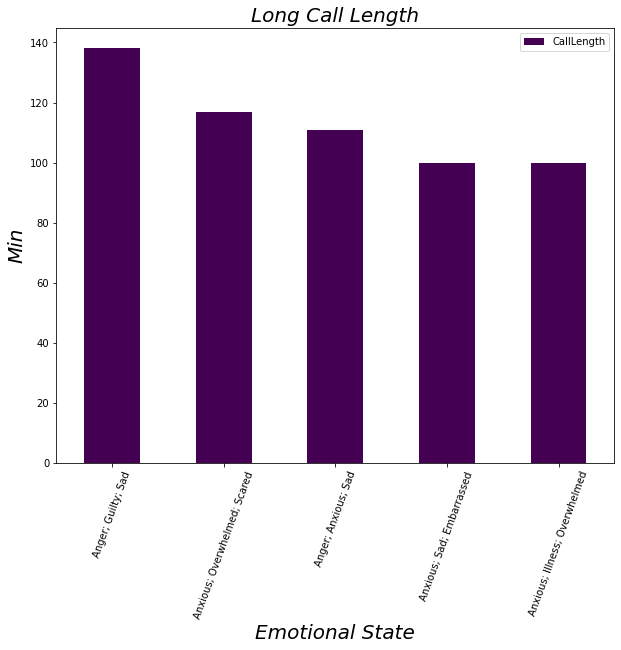

In [231]:
large_length.plot.bar(x='CRISIS Issues - Emotional State', rot=0, figsize=(10, 8), cmap="viridis")
plt.title('Long Call Length', fontsize=20, fontstyle='oblique')
plt.xlabel('Emotional State', fontsize=20, fontstyle='oblique')
plt.xticks(rotation = 70)
plt.ylabel('Min', fontsize=20, fontstyle='oblique')
plt.show()

longest call length chart

In [211]:
length = mental_health_df[['CallLength', 'CRISIS Issues - Emotional State']].copy()

In [221]:
small_length = length.nsmallest(5, ['CallLength'])

In [222]:
small_length = small_length.replace('Anger/Hostility; Emotional Abandonment', 'Anger; Emotional Abandonment')
small_length = small_length.replace('Anxious/Stressed; Emotional Abandonment', 'Anxious; Emotional Abandonment')

In [223]:
small_length

,CallLength,CRISIS Issues - Emotional State
17313,0,Anger; Emotional Abandonment
366,1,Anxious; Emotional Abandonment
541,1,Lonely
558,1,Lonely
734,1,Bored; Lonely


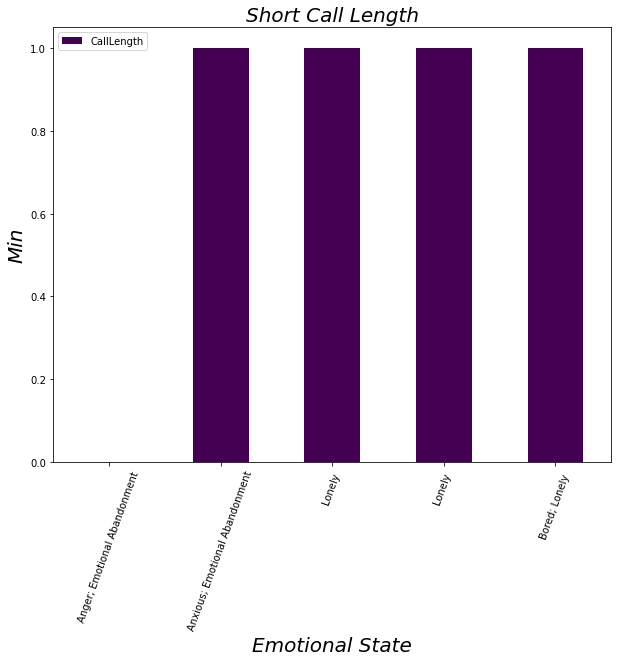

In [230]:
small_length.plot.bar(x='CRISIS Issues - Emotional State', rot=0, figsize=(10, 8), cmap="viridis")
plt.title('Short Call Length', fontsize=20, fontstyle='oblique')
plt.xlabel('Emotional State', fontsize=20, fontstyle='oblique')
plt.xticks(rotation = 70)
plt.ylabel('Min', fontsize=20, fontstyle='oblique')
plt.show()